# Logisitic Regression Example with Kaggle Titanic Dataset

## Import Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the passenger data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#passengers = pd.concat([train,test],sort=False)

## Inspect Data

In [2]:
#print(passengers.head())
print(train.head())
#print(test.head())
#print(train.info())
print(test.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

The training dataset includes Survived column while the test one does not as that is the field we are trying to predict.  Some other features include, Train: lot of null cabin values, some in age and embarked as well, Test: lot of null cabin vales, some in age, fare, and embarked as well.

## Clean Data

In [3]:
# Update sex column to numerical
train["Sex"] = train.Sex.apply(lambda x: 1 if x == "female" else 0)
test["Sex"] = test.Sex.apply(lambda x: 1 if x == "female" else 0)

# Fill the nan values in the age column
#print(train.Age.values) # check na's
train.Age.fillna(train.Age.mean(), inplace = True)
test.Age.fillna(test.Age.mean(), inplace = True)

# How many classes
print(train.Pclass.unique())

# Create a first class column
train["FirstClass"] = train.Pclass.apply(lambda x: 1 if x == 1 else 0)
test["FirstClass"] = test.Pclass.apply(lambda x: 1 if x == 1 else 0)

# Create a second and third class column
train["SecondClass"] = train.Pclass.apply(lambda x: 1 if x == 2 else 0)
test["SecondClass"] = test.Pclass.apply(lambda x: 1 if x == 2 else 0)

train["ThirdClass"] = train.Pclass.apply(lambda x: 1 if x == 3 else 0)
test["ThirdClass"] = test.Pclass.apply(lambda x: 1 if x == 3 else 0)

#Check it worked
print(train[["Sex", "Age", "Pclass", "FirstClass", "SecondClass", "ThirdClass"]])
#print(test[["Sex", "Age", "Pclass", "FirstClass", "SecondClass", "ThirdClass"]])

[3 1 2]
     Sex        Age  Pclass  FirstClass  SecondClass  ThirdClass
0      0  22.000000       3           0            0           1
1      1  38.000000       1           1            0           0
2      1  26.000000       3           0            0           1
3      1  35.000000       1           1            0           0
4      0  35.000000       3           0            0           1
..   ...        ...     ...         ...          ...         ...
886    0  27.000000       2           0            1           0
887    1  19.000000       1           1            0           0
888    1  29.699118       3           0            0           1
889    0  26.000000       1           1            0           0
890    0  32.000000       3           0            0           1

[891 rows x 6 columns]


## Select and Scale Fields

In [4]:
# Select the desired features
labels = ["Sex", "Age", "FirstClass", "SecondClass", "ThirdClass"]
predictors = train[labels]
survival = train["Survived"]

test_predictors = test[labels]

# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)
test_predictors_scaled = scaler.transform(test_predictors)

#Check Scaled Data
print(predictors_scaled)
print(test_predictors_scaled)

[[-0.73769513 -0.5924806  -0.56568542 -0.51015154  0.90258736]
 [ 1.35557354  0.63878901  1.76776695 -0.51015154 -1.10792599]
 [ 1.35557354 -0.2846632  -0.56568542 -0.51015154  0.90258736]
 ...
 [ 1.35557354  0.         -0.56568542 -0.51015154  0.90258736]
 [-0.73769513 -0.2846632   1.76776695 -0.51015154 -1.10792599]
 [-0.73769513  0.17706291 -0.56568542 -0.51015154  0.90258736]]
[[-0.73769513  0.36944878 -0.56568542 -0.51015154  0.90258736]
 [ 1.35557354  1.33137817 -0.56568542 -0.51015154  0.90258736]
 [-0.73769513  2.48569343 -0.56568542  1.96020185 -1.10792599]
 ...
 [-0.73769513  0.67726619 -0.56568542 -0.51015154  0.90258736]
 [-0.73769513  0.04413122 -0.56568542 -0.51015154  0.90258736]
 [-0.73769513  0.04413122 -0.56568542 -0.51015154  0.90258736]]


## Fit Logisitic Regression Model

In [5]:
# Create and train the model
model = LogisticRegression()
model.fit(predictors_scaled, survival)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Analyze Model

In [6]:
# Score the model on the train data
train_score = model.score(predictors_scaled, survival)
print(train_score)

# Analyze the coefficients
print(list(zip(labels, model.coef_[0])))

0.8013468013468014
[('Sex', 1.2361037614708328), ('Age', -0.425979561645433), ('FirstClass', 0.5413533479565895), ('SecondClass', 0.06293829378799866), ('ThirdClass', -0.5176552912370285)]


Sex is the most important predicting factor, followed by FirstClass, ThirdClass, and then Age. SecondClass is the least significant predictor.

## Create and Scale New Data

In [10]:
# Sample passenger features
Jack = np.array([0.0,20.0,0.0,0.0, 1.0])
Rose = np.array([1.0,17.0,1.0,0.0, 0.0])
Someone = np.array([1.0,22.0,0.0,1.0, 0.0])

# Combine passenger arrays
sample_passengers = np.array([Jack, Rose, Someone])

# Scale the sample passenger features
sample_passengers_scaled = scaler.transform(sample_passengers)
print(sample_passengers_scaled)

[[-0.73769513 -0.7463893  -0.56568542 -0.51015154  0.90258736]
 [ 1.35557354 -0.97725235  1.76776695 -0.51015154 -1.10792599]
 [ 1.35557354 -0.5924806  -0.56568542  1.96020185 -1.10792599]]


These are the scaled predictor values of our 3 new passengers, let's predict their chances of survival.

## Predict New Data

In [11]:
# Make survival predictions!
print(model.predict(sample_passengers_scaled))
print(model.predict_proba(sample_passengers_scaled))

[0 1 1]
[[0.88570414 0.11429586]
 [0.05010538 0.94989462]
 [0.15834748 0.84165252]]


Our first passenger isn't predicted to survive with only 11% chance of survival.  However, our other 2 both are predicted to survive with 95% and 84% respectively.

## Predict Test Data

[0 0 0 0 1 0 1 0 1 0]
[[0.92573284 0.07426716]
 [0.5854487  0.4145513 ]
 [0.90275004 0.09724996]
 [0.90695921 0.09304079]
 [0.38358891 0.61641109]
 [0.86423353 0.13576647]
 [0.44717417 0.55282583]
 [0.74039947 0.25960053]
 [0.35309402 0.64690598]
 [0.88898091 0.11101909]]


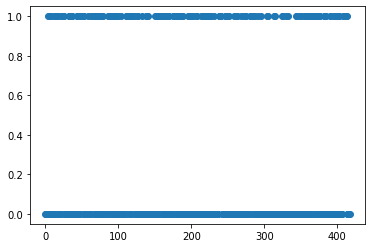

In [21]:
# Test data survival predictions
test_predictions = model.predict(test_predictors_scaled)
print(test_predictions[:10])
test_prob = model.predict_proba(test_predictors_scaled)
print(test_prob[:10]) #cut off at 10 for easier viewing

# Plot
plt.plot(test_predictions, "o")


plt.show()

With the test data provided, we can analyze each passenger and predict if they survived and their chances of survival.